# MEEP Refractor Optical System Add-On Demo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from meep_optics import OpticalSystem, AsphericLens, ApertureStop, ImagePlane, Sim, Analysis

Let's just have a quick example of what is possible with the code in the current state.
First, we define the optical system by giving it a name, and a size : 

In [3]:
opt_sys = OpticalSystem('Optical System 1')

The optical axis is along x, so the optical system is a bit longer than it is wide.

In [4]:
opt_sys.set_size(200,50)

Let's add elements. Begin with a simple lens :

In [5]:
lens1 = AsphericLens(name = 'Lens 1', 
                         r1 = 50, 
                         r2 = np.inf, 
                         c1 = 0, 
                         c2 = 0, 
                         thick = 5, 
                         x = 100, 
                         y = 0.)

An aperture stop at the left, with some high conductivty, let's say it's a metal : 

In [6]:
aperture_stop = ApertureStop(name = 'Aperture Stop',
                                 pos_x = 10,
                                 diameter = 40,
                                 thickness = 2,
                                 index = 5., 
                                 conductivity = 1e7)

And an image plane at the right, again, some metal : 

In [7]:
image_plane = ImagePlane(name = 'Image Plane',
                             pos_x = 190,
                             diameter = 50,
                             thickness = 2,
                             index = 5., 
                             conductivity = 0.01)

Now add the components to the optical system :

In [8]:
opt_sys.add_component(lens1)
opt_sys.add_component(aperture_stop)
opt_sys.add_component(image_plane)

We can check that everything's there :

In [9]:
print(opt_sys.list_components())

 Lens 1 Aperture Stop Image Plane


Let's choose a frequency to study the system, so that we can set the boundary conditions be a Perfectly Matched Layer of half a wavelength :

In [10]:
study_freq = 0.05
dpml = np.int(np.around(0.5*1/study_freq))

We can assemble the system, with a certain resolution (remember that res/freq > 8) :

In [11]:
opt_sys.assemble_system(dpml = dpml, resolution = 1)

We can have a quick look at the lens : 

In [13]:
%matplotlib inline
plt.figure(figsize = (20,20))
opt_sys.plot_lenses()

Now, we just need to write the h5 file containing the map so that it's later read by the sim.

In [14]:
opt_sys.write_h5file()

Define the simulation from the optical system :

In [15]:
sim = Sim(opt_sys)

Let's have a plane wave coming on the aperture :

In [16]:
sim.define_source(study_freq, sourcetype = 'Plane wave', 
                       x=1, y=0, size_x = 0, size_y = 50)

Now we can run the sim : 

In [17]:
sim.run_sim(runtime = 200, sim_resolution = 1)

-----------
Initializing structure...
read in 221x71x1 epsilon-input-file "epsilon_map.h5:eps"
time for choose_chunkdivision = 0.000123024 s
Working in 2D dimensions.
Computational cell is 220 x 70 x 0 with resolution 1
     block, center = (-90,27.5,0)
          size (2,15,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (-90,-27.5,0)
          size (2,15,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (90,0,0)
          size (2,50,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
time for set_epsilon = 0.0343711 s
time for set_conductivity = 0.00107813 s
time for set_conductivity = 0.00108886 s
time for set_conductivity = 0.00108194 s
-----------
run 0 finished at t = 200.0 (400 timesteps)


We can plot the system to check that everything is all right 

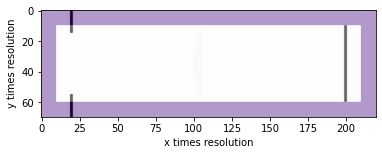

In [18]:
sim.plot_system()

We can't really see the lens because it's permittivty is much lower than the other two components but it's there.

Now let's plot the propagated electric field from the sim 

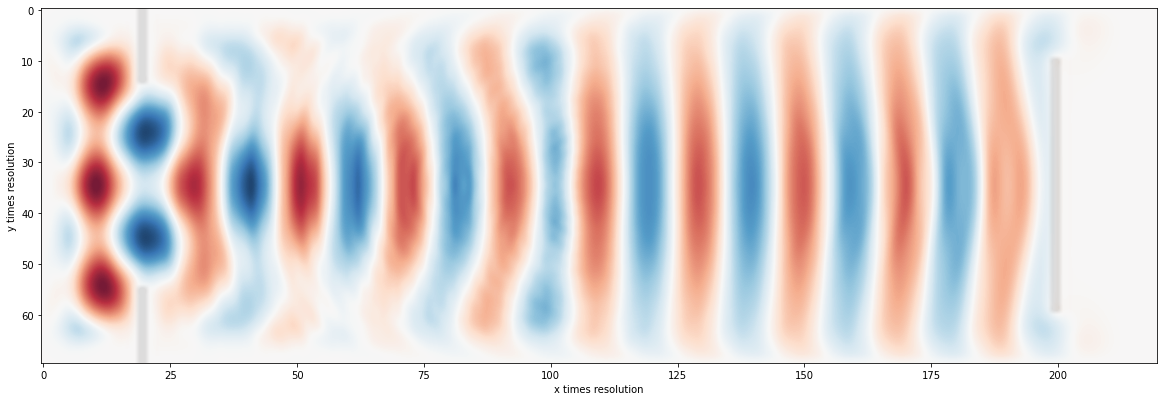

In [19]:
sim.plot_efield()

We can plot the evolution of the squared electric field over the image plane, but the system is far from focused, so it won't give much information :

on time step 400 (time=200), 1.11305 s/step
run 1 finished at t = 201.0 (402 timesteps)
run 2 finished at t = 202.0 (404 timesteps)
run 3 finished at t = 203.0 (406 timesteps)
run 4 finished at t = 204.0 (408 timesteps)
run 5 finished at t = 205.0 (410 timesteps)
run 6 finished at t = 206.0 (412 timesteps)
run 7 finished at t = 207.0 (414 timesteps)
run 8 finished at t = 208.0 (416 timesteps)
run 9 finished at t = 209.0 (418 timesteps)
run 10 finished at t = 210.0 (420 timesteps)
run 11 finished at t = 211.0 (422 timesteps)
run 12 finished at t = 212.0 (424 timesteps)
run 13 finished at t = 213.0 (426 timesteps)
run 14 finished at t = 214.0 (428 timesteps)
run 15 finished at t = 215.0 (430 timesteps)
run 16 finished at t = 216.0 (432 timesteps)
run 17 finished at t = 217.0 (434 timesteps)
run 18 finished at t = 218.0 (436 timesteps)
run 19 finished at t = 219.0 (438 timesteps)
run 20 finished at t = 220.0 (440 timesteps)
run 21 finished at t = 221.0 (442 timesteps)
run 22 finished at t

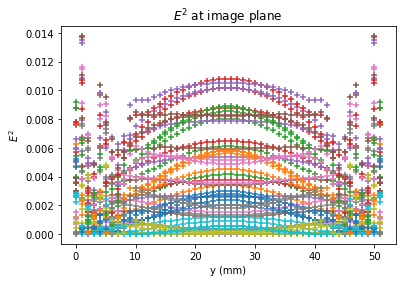

In [20]:
sim.plot_airy_spot()

We can also decide to have a Gaussian Beam sent from the image plane :

In [21]:
sim = Sim(opt_sys)
sim.define_source(study_freq, sourcetype = 'Gaussian beam', 
                  x=185, y= 0, beam_width = 10,
                  size_x = 0, size_y = 5,
                  focus_pt_x= 0, focus_pt_y=0)

-----------
Initializing structure...
read in 221x71x1 epsilon-input-file "epsilon_map.h5:eps"
time for choose_chunkdivision = 0.000344038 s
Working in 2D dimensions.
Computational cell is 220 x 70 x 0 with resolution 1
     block, center = (-90,27.5,0)
          size (2,15,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (-90,-27.5,0)
          size (2,15,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (90,0,0)
          size (2,50,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
time for set_epsilon = 0.0288441 s
time for set_conductivity = 0.00099802 s
time for set_conductivity = 0.00100303 s
time for set_conductivity = 0.00100303 s
-----------
run 0 finished at t = 200.0 (400 timesteps)


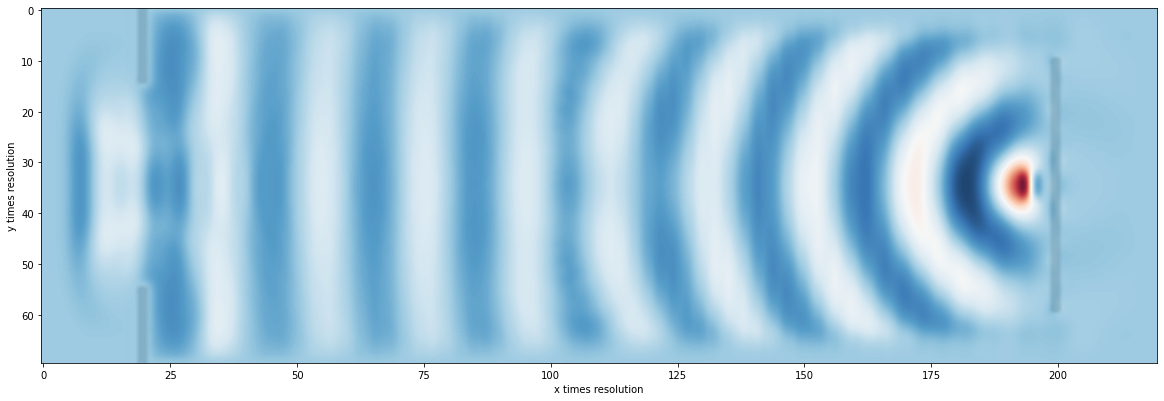

In [22]:
sim.run_sim(runtime = 200, sim_resolution = 1)
sim.plot_efield()

We can also have a multichromatic beam, that will send a Gaussian pulse containing all frequencies within df of the center frequency :

In [23]:
sim = Sim(opt_sys)
sim.define_source(0.1, sourcetype = 'Gaussian beam multichromatic', 
                   x=185, y= 0, beam_width = 10, 
                   focus_pt_x= 0, focus_pt_y=0,
                    size_x = 0, size_y = 5,
                   fwidth = 0.02)
sim.run_sim(runtime = 150, sim_resolution = 1)

-----------
Initializing structure...
read in 221x71x1 epsilon-input-file "epsilon_map.h5:eps"
time for choose_chunkdivision = 0.000123024 s
Working in 2D dimensions.
Computational cell is 220 x 70 x 0 with resolution 1
     block, center = (-90,27.5,0)
          size (2,15,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (-90,-27.5,0)
          size (2,15,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (90,0,0)
          size (2,50,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
time for set_epsilon = 0.0307641 s
time for set_conductivity = 0.000996113 s
time for set_conductivity = 0.00099802 s
time for set_conductivity = 0.000990152 s
-----------
run 0 finished at t = 150.0 (300 timesteps)


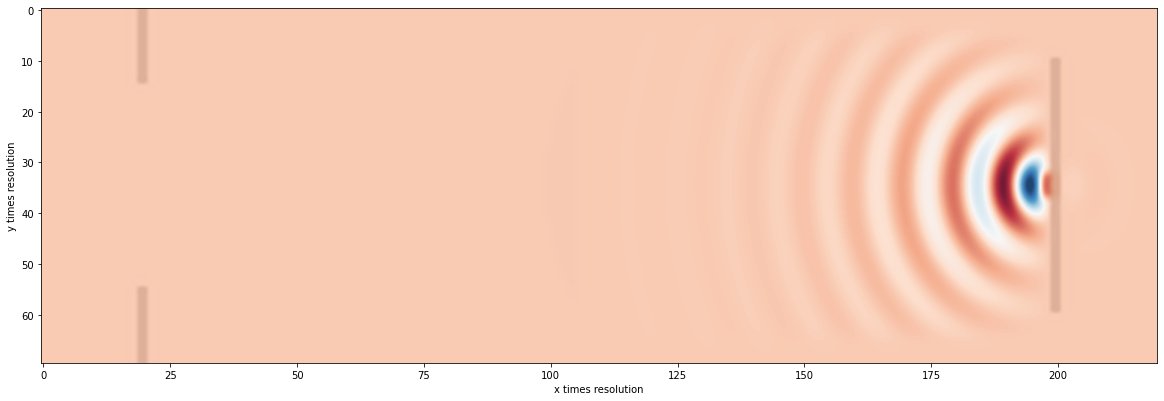

In [24]:
sim.plot_efield()

If we run the simulation a bit longer, the field will decay away :

on time step 500 (time=250), 1.01077 s/step
run 2 finished at t = 750.0 (1500 timesteps)


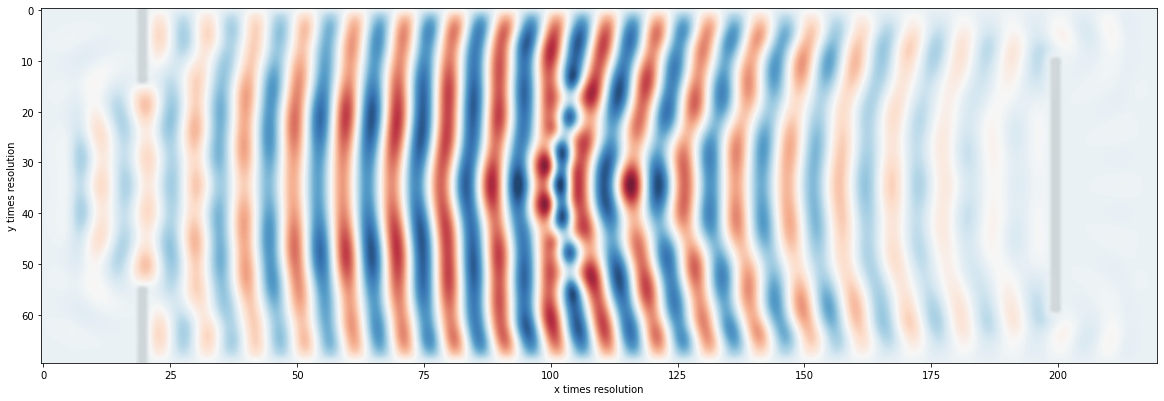

In [26]:
sim.sim.run(until = 500)
sim.plot_efield()

(Note, if we let it run longer, there are a lot of reflections going on inside that take a long time to really decay)

Finally we can use the Analysis class to see how different beam positions give different patterns at the aperture

-----------
Initializing structure...
read in 221x71x1 epsilon-input-file "epsilon_map.h5:eps"
time for choose_chunkdivision = 0.000117779 s
Working in 2D dimensions.
Computational cell is 220 x 70 x 0 with resolution 1
     block, center = (-90,27.5,0)
          size (2,15,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (-90,-27.5,0)
          size (2,15,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (90,0,0)
          size (2,50,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
time for set_epsilon = 0.031714 s
time for set_conductivity = 0.00101209 s
time for set_conductivity = 0.00098896 s
time for set_conductivity = 0.000983 s
-----------
run 0 finished at t = 750.0 (1500 timesteps)
run 1 finished at t = 750.5 (1501 timesteps)
run 2 finished at t = 751.0 (1502 timesteps)
run 

run 172 finished at t = 836.0 (1672 timesteps)
run 173 finished at t = 836.5 (1673 timesteps)
run 174 finished at t = 837.0 (1674 timesteps)
run 175 finished at t = 837.5 (1675 timesteps)
run 176 finished at t = 838.0 (1676 timesteps)
run 177 finished at t = 838.5 (1677 timesteps)
run 178 finished at t = 839.0 (1678 timesteps)
run 179 finished at t = 839.5 (1679 timesteps)
run 180 finished at t = 840.0 (1680 timesteps)
run 181 finished at t = 840.5 (1681 timesteps)
run 182 finished at t = 841.0 (1682 timesteps)
run 183 finished at t = 841.5 (1683 timesteps)
run 184 finished at t = 842.0 (1684 timesteps)
run 185 finished at t = 842.5 (1685 timesteps)
run 186 finished at t = 843.0 (1686 timesteps)
run 187 finished at t = 843.5 (1687 timesteps)
run 188 finished at t = 844.0 (1688 timesteps)
run 189 finished at t = 844.5 (1689 timesteps)
run 190 finished at t = 845.0 (1690 timesteps)
run 191 finished at t = 845.5 (1691 timesteps)
run 192 finished at t = 846.0 (1692 timesteps)
run 193 finis

run 533 finished at t = 1016.5 (2033 timesteps)
run 534 finished at t = 1017.0 (2034 timesteps)
run 535 finished at t = 1017.5 (2035 timesteps)
run 536 finished at t = 1018.0 (2036 timesteps)
run 537 finished at t = 1018.5 (2037 timesteps)
run 538 finished at t = 1019.0 (2038 timesteps)
run 539 finished at t = 1019.5 (2039 timesteps)
run 540 finished at t = 1020.0 (2040 timesteps)
run 541 finished at t = 1020.5 (2041 timesteps)
run 542 finished at t = 1021.0 (2042 timesteps)
run 543 finished at t = 1021.5 (2043 timesteps)
run 544 finished at t = 1022.0 (2044 timesteps)
run 545 finished at t = 1022.5 (2045 timesteps)
run 546 finished at t = 1023.0 (2046 timesteps)
run 547 finished at t = 1023.5 (2047 timesteps)
run 548 finished at t = 1024.0 (2048 timesteps)
run 549 finished at t = 1024.5 (2049 timesteps)
run 550 finished at t = 1025.0 (2050 timesteps)
run 551 finished at t = 1025.5 (2051 timesteps)
run 552 finished at t = 1026.0 (2052 timesteps)
run 553 finished at t = 1026.5 (2053 tim

run 939 finished at t = 1219.5 (2439 timesteps)
run 940 finished at t = 1220.0 (2440 timesteps)
run 941 finished at t = 1220.5 (2441 timesteps)
run 942 finished at t = 1221.0 (2442 timesteps)
run 943 finished at t = 1221.5 (2443 timesteps)
run 944 finished at t = 1222.0 (2444 timesteps)
run 945 finished at t = 1222.5 (2445 timesteps)
run 946 finished at t = 1223.0 (2446 timesteps)
run 947 finished at t = 1223.5 (2447 timesteps)
run 948 finished at t = 1224.0 (2448 timesteps)
run 949 finished at t = 1224.5 (2449 timesteps)
run 950 finished at t = 1225.0 (2450 timesteps)
run 951 finished at t = 1225.5 (2451 timesteps)
run 952 finished at t = 1226.0 (2452 timesteps)
run 953 finished at t = 1226.5 (2453 timesteps)
run 954 finished at t = 1227.0 (2454 timesteps)
run 955 finished at t = 1227.5 (2455 timesteps)
run 956 finished at t = 1228.0 (2456 timesteps)
run 957 finished at t = 1228.5 (2457 timesteps)
run 958 finished at t = 1229.0 (2458 timesteps)
run 959 finished at t = 1229.5 (2459 tim

run 324 finished at t = 912.0 (1824 timesteps)
run 325 finished at t = 912.5 (1825 timesteps)
run 326 finished at t = 913.0 (1826 timesteps)
run 327 finished at t = 913.5 (1827 timesteps)
run 328 finished at t = 914.0 (1828 timesteps)
run 329 finished at t = 914.5 (1829 timesteps)
run 330 finished at t = 915.0 (1830 timesteps)
run 331 finished at t = 915.5 (1831 timesteps)
run 332 finished at t = 916.0 (1832 timesteps)
run 333 finished at t = 916.5 (1833 timesteps)
run 334 finished at t = 917.0 (1834 timesteps)
run 335 finished at t = 917.5 (1835 timesteps)
run 336 finished at t = 918.0 (1836 timesteps)
run 337 finished at t = 918.5 (1837 timesteps)
run 338 finished at t = 919.0 (1838 timesteps)
run 339 finished at t = 919.5 (1839 timesteps)
run 340 finished at t = 920.0 (1840 timesteps)
run 341 finished at t = 920.5 (1841 timesteps)
run 342 finished at t = 921.0 (1842 timesteps)
run 343 finished at t = 921.5 (1843 timesteps)
run 344 finished at t = 922.0 (1844 timesteps)
run 345 finis

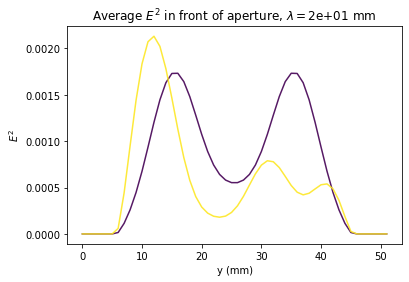

In [27]:
sim = Sim(opt_sys)
analysis = Analysis(sim)
analysis.image_plane_beams(study_freq, fwidth = 0.01, sourcetype='Gaussian beam multichromatic',
                                y_max = 20, Nb_sources = 2, sim_resolution = 1)

We can also look at the FT of these fields, giving us the far field beam :

In [28]:
freq, ffts = analysis.beam_FT(aperture_size = 40)

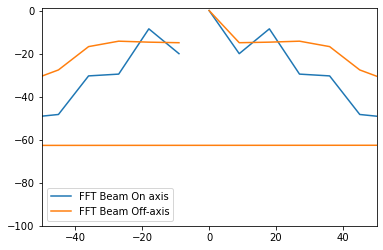

In [29]:
fft1_dB = 10*np.log10(ffts[0].real**2)
fft2_dB = 10*np.log10(ffts[1].real**2)

plt.figure()
plt.plot(freq*360, fft1_dB)
plt.plot(freq*360, fft2_dB)
plt.legend(('FFT Beam On axis', 'FFT Beam Off-axis'))
plt.ylim((-100, 1))
plt.xlim((-50,50))
plt.show()

Of course, due to the low resolution and the shortness of the aperture, the FT looks terrible.

It's possible to add a few details, like AR coating, for which we should choose a thickness such that it's a quarter wavelength.

-----------
Initializing structure...
read in 211x61x1 epsilon-input-file "epsilon_map.h5:eps"
time for choose_chunkdivision = 0.000113964 s
Working in 2D dimensions.
Computational cell is 210 x 60 x 0 with resolution 1
     block, center = (-90,25,0)
          size (2,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (-90,-25,0)
          size (2,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (90,0,0)
          size (2,50,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
time for set_epsilon = 0.0243099 s
time for set_conductivity = 0.000835896 s
time for set_conductivity = 0.000841856 s
time for set_conductivity = 0.000845909 s
-----------
run 0 finished at t = 300.0 (600 timesteps)


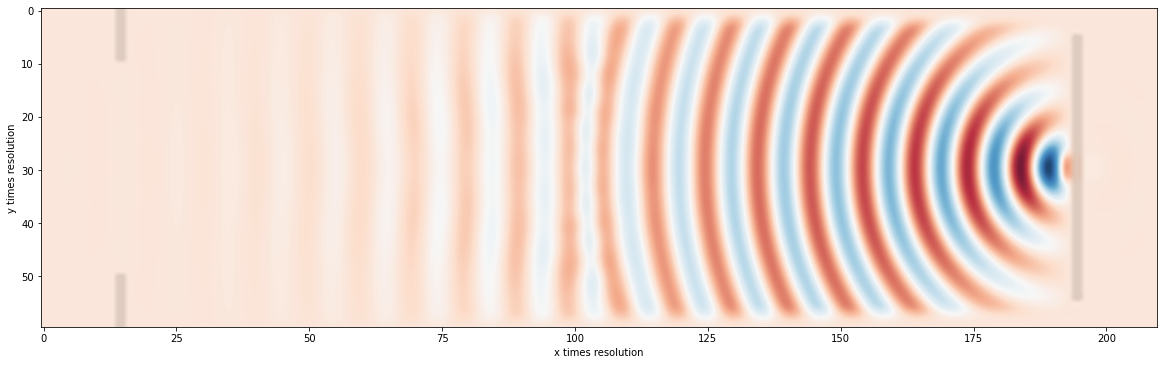

In [33]:
opt_sys = OpticalSystem('test')
opt_sys.set_size(200,50)
study_freq = 0.1
AR_coating = 0.25*1/study_freq
lens1 = AsphericLens(name = 'Lens 1', 
                         r1 = 50, 
                         r2 = np.inf, 
                         c1 = 0, 
                         c2 = 0, 
                         thick = 5, 
                         x = 100, 
                         y = 0.,
                        AR_left = AR_coating,
                        AR_right = AR_coating)
opt_sys.add_component(lens1)
opt_sys.add_component(aperture_stop)
opt_sys.add_component(image_plane)
dpml = np.int(np.around(0.5*1/study_freq))
opt_sys.assemble_system(dpml = dpml, resolution = 1)
opt_sys.write_h5file()
sim = Sim(opt_sys)
sim.define_source(study_freq, sourcetype = 'Gaussian beam multichromatic', 
                   x=185, y= 0, beam_width = 10, 
                   focus_pt_x= 0, focus_pt_y=0,
                    size_x = 0, size_y = 5,
                   fwidth = 0.02)
sim.run_sim(runtime = 300, sim_resolution = 1)
sim.plot_efield()

on time step 600 (time=300), 0.0112009 s/step
run 1 finished at t = 400.0 (800 timesteps)


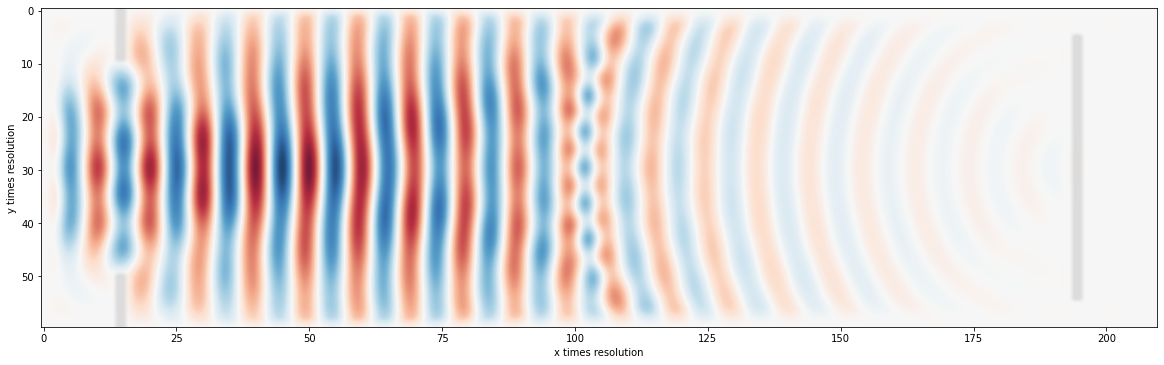

In [34]:
sim.sim.run(until = 100)
sim.plot_efield()

We can see qualitatively that there are less reflections

Another detail we can add is AR coating delamination (we set it at 1 as it's the smallest possible for a resolution of 1) :

-----------
Initializing structure...
read in 211x61x1 epsilon-input-file "epsilon_map.h5:eps"
time for choose_chunkdivision = 0.00010705 s
Working in 2D dimensions.
Computational cell is 210 x 60 x 0 with resolution 1
     block, center = (-90,25,0)
          size (2,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (-90,-25,0)
          size (2,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
     block, center = (90,0,0)
          size (2,50,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (25,25,25)
time for set_epsilon = 0.0264549 s
time for set_conductivity = 0.000884056 s
time for set_conductivity = 0.00090003 s
time for set_conductivity = 0.000896931 s
-----------
run 0 finished at t = 150.0 (300 timesteps)


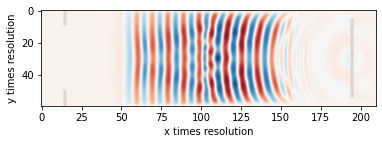

In [30]:
opt_sys = OpticalSystem('test')
opt_sys.set_size(200,50)
study_freq = 0.1
AR_coating = 0.25*1/study_freq
lens1 = AsphericLens(name = 'Lens 1', 
                         r1 = 50, 
                         r2 = np.inf, 
                         c1 = 0, 
                         c2 = 0, 
                         thick = 5, 
                         x = 100, 
                         y = 0.,
                        AR_left = AR_coating,
                        AR_right = AR_coating,
                        AR_delamination = 1)
opt_sys.add_component(lens1)
opt_sys.add_component(aperture_stop)
opt_sys.add_component(image_plane)
dpml = np.int(np.around(0.5*1/study_freq))
opt_sys.assemble_system(dpml = dpml, resolution = 1)
opt_sys.write_h5file()
sim = Sim(opt_sys)
sim.define_source(study_freq, sourcetype = 'Gaussian beam multichromatic', 
                   x=185, y= 0, beam_width = 10, 
                   focus_pt_x= 0, focus_pt_y=0,
                    size_x = 0, size_y = 5,
                   fwidth = 0.02)
sim.run_sim(runtime = 150, sim_resolution = 1)
sim.plot_efield()

on time step 300 (time=150), 0.0520945 s/step
run 1 finished at t = 250.0 (500 timesteps)


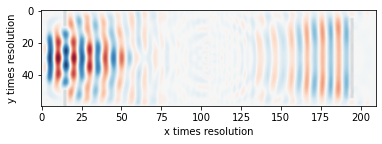

In [31]:
sim.sim.run(until = 100)
sim.plot_efield()

Some reflection has occured, and to look precisely we can use the plotting tools we showed before.